### **Teste T de Student**

#### **Comparação entre os retornos diários de setores industriais e imobiliários**

- H0 (Hipótese Nula): Não há diferença significativa nos retornos diários entre os setores industriais e imobiliários.  
- H1 (Hipótese Alternativa): Há uma diferença significativa nos retornos diários entre os setores industriais e imobiliários.

#### **Dados**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

Extração e tratamento de dados do yfinance

In [2]:
tickers_industriais = ['PETR3.SA', 'VALE3.SA', 'CSNA3.SA', 'GGBR3.SA', 'USIM5.SA', 
                       'KLBN11.SA', 'EMBR3.SA', 'BRKM5.SA', 'FESA4.SA', 'RENT3.SA', 
                       'WEGE3.SA', 'RAIL3.SA', 'SUZB3.SA', 'BRAP4.SA', 'GOAU4.SA']

tickers_imobiliario = ['MRVE3.SA', 'DIRR3.SA', 'EZTC3.SA', 'MULT3.SA', 'TEND3.SA',
                       'JHSF3.SA', 'VIVT3.SA', 'SHUL4.SA', 'CYRE3.SA', 'RSID3.SA',
                       'HBOR3.SA', 'TRIS3.SA', 'CVCB3.SA', 'LOGG3.SA', 'ALZR11.SA']

In [3]:
dados_industriais = yf.download(tickers_industriais, start='2022-06-01', end='2024-06-30')['Adj Close']
dados_imobiliario = yf.download(tickers_imobiliario, start='2022-06-01', end='2024-06-30')['Adj Close']
dados_industriais = dados_industriais.ffill().bfill()
dados_imobiliario = dados_imobiliario.ffill().bfill()

# Calcular retornos diários
retornos_indust = dados_industriais.pct_change(fill_method=None).dropna()
retornos_imob = dados_imobiliario.pct_change(fill_method=None).dropna()

[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed


In [4]:
retornos_indust

Ticker,BRAP4.SA,BRKM5.SA,CSNA3.SA,EMBR3.SA,FESA4.SA,GGBR3.SA,GOAU4.SA,KLBN11.SA,PETR3.SA,RAIL3.SA,RENT3.SA,SUZB3.SA,USIM5.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2022-06-02,0.039713,0.005924,0.035167,0.036604,0.027730,0.031291,0.044046,0.002644,-0.009329,0.031478,-0.019167,0.004463,0.052398,0.018812,0.004578
2022-06-03,-0.015476,0.005671,-0.006969,-0.024793,-0.005734,-0.006743,-0.007812,-0.024176,0.025516,0.002180,-0.028779,-0.022029,-0.015190,-0.016018,-0.015572
2022-06-06,0.007692,-0.000651,-0.035088,0.011556,-0.012551,0.008061,0.007087,0.001802,-0.000592,-0.008156,-0.024877,0.010979,-0.021422,0.001017,0.002315
2022-06-07,0.012944,-0.023655,0.005909,-0.000762,0.013225,0.008418,-0.000782,-0.000450,0.003557,-0.020285,0.004315,0.016476,-0.027145,0.023377,-0.001155
2022-06-08,-0.024246,-0.005779,-0.049254,-0.007622,-0.020851,-0.039649,-0.031299,-0.013046,-0.003840,-0.012311,-0.027830,-0.031682,-0.043204,-0.034430,-0.059345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,0.004452,0.002228,0.004743,-0.010298,0.005115,-0.004994,0.005803,-0.001457,0.019055,0.010474,0.011511,0.015967,0.019894,0.001151,-0.005112
2024-06-25,-0.006648,0.001112,-0.011015,0.007204,-0.010178,-0.000627,0.000000,0.003405,-0.003586,0.003949,0.001185,0.001410,-0.019506,-0.004105,0.017127
2024-06-26,0.015059,-0.008884,-0.002387,0.007152,0.024422,0.010672,0.011539,0.010179,0.005141,0.012783,0.004026,0.022334,0.033156,0.012366,0.009141


In [5]:
retornos_imob

Ticker,ALZR11.SA,CVCB3.SA,CYRE3.SA,DIRR3.SA,EZTC3.SA,HBOR3.SA,JHSF3.SA,LOGG3.SA,MRVE3.SA,MULT3.SA,RSID3.SA,SHUL4.SA,TEND3.SA,TRIS3.SA,VIVT3.SA
Date,,,,,,,,,,,,,,,
2022-06-02,-0.000259,-0.001852,0.006608,0.003653,0.015971,-0.003279,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086
2022-06-03,-0.002330,-0.021336,-0.002188,-0.035487,-0.019952,-0.016447,-0.020173,0.007039,-0.021829,-0.005650,-0.037657,0.017167,-0.049383,-0.026178,-0.013900
2022-06-06,-0.006488,-0.026540,-0.033626,-0.037736,-0.032696,-0.026756,-0.019118,-0.056356,-0.038257,-0.024351,-0.073913,-0.012658,-0.095238,-0.029570,-0.029581
2022-06-07,0.001306,0.000000,-0.022693,-0.013725,-0.014668,-0.017182,-0.014992,-0.017130,-0.016575,-0.023711,-0.014085,-0.002137,0.007177,-0.016621,-0.017799
2022-06-08,0.006087,-0.019474,-0.025542,-0.006958,-0.017476,-0.013986,-0.012177,0.007065,-0.025843,-0.005539,0.038095,-0.027837,0.016627,-0.022535,-0.012706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-0.001199,0.036842,0.027924,0.021774,0.030233,0.029126,0.031169,0.024028,0.054299,0.038288,0.009434,0.005017,0.027307,0.023656,0.016183
2024-06-25,0.001755,-0.025381,0.002563,0.017048,0.006772,-0.023585,0.005038,0.002560,-0.001431,-0.009545,-0.005607,0.008319,-0.012832,0.002101,0.003097
2024-06-26,-0.001199,-0.010417,-0.024540,0.016762,-0.025411,-0.014493,-0.020050,-0.003830,-0.034384,0.007446,0.013158,-0.006601,-0.015785,-0.006289,0.018302


In [6]:
# Adicionar coluna do setor
retornos_indust['Setor'] = 'Industriais'

retornos_indust

Ticker,BRAP4.SA,BRKM5.SA,CSNA3.SA,EMBR3.SA,FESA4.SA,GGBR3.SA,GOAU4.SA,KLBN11.SA,PETR3.SA,RAIL3.SA,RENT3.SA,SUZB3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,Setor
Date,,,,,,,,,,,,,,,,
2022-06-02,0.039713,0.005924,0.035167,0.036604,0.027730,0.031291,0.044046,0.002644,-0.009329,0.031478,-0.019167,0.004463,0.052398,0.018812,0.004578,Industriais
2022-06-03,-0.015476,0.005671,-0.006969,-0.024793,-0.005734,-0.006743,-0.007812,-0.024176,0.025516,0.002180,-0.028779,-0.022029,-0.015190,-0.016018,-0.015572,Industriais
2022-06-06,0.007692,-0.000651,-0.035088,0.011556,-0.012551,0.008061,0.007087,0.001802,-0.000592,-0.008156,-0.024877,0.010979,-0.021422,0.001017,0.002315,Industriais
2022-06-07,0.012944,-0.023655,0.005909,-0.000762,0.013225,0.008418,-0.000782,-0.000450,0.003557,-0.020285,0.004315,0.016476,-0.027145,0.023377,-0.001155,Industriais
2022-06-08,-0.024246,-0.005779,-0.049254,-0.007622,-0.020851,-0.039649,-0.031299,-0.013046,-0.003840,-0.012311,-0.027830,-0.031682,-0.043204,-0.034430,-0.059345,Industriais
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,0.004452,0.002228,0.004743,-0.010298,0.005115,-0.004994,0.005803,-0.001457,0.019055,0.010474,0.011511,0.015967,0.019894,0.001151,-0.005112,Industriais
2024-06-25,-0.006648,0.001112,-0.011015,0.007204,-0.010178,-0.000627,0.000000,0.003405,-0.003586,0.003949,0.001185,0.001410,-0.019506,-0.004105,0.017127,Industriais
2024-06-26,0.015059,-0.008884,-0.002387,0.007152,0.024422,0.010672,0.011539,0.010179,0.005141,0.012783,0.004026,0.022334,0.033156,0.012366,0.009141,Industriais


In [7]:
# Adicionar coluna do setor
retornos_imob['Setor'] = 'Imobiliário'

retornos_imob

Ticker,ALZR11.SA,CVCB3.SA,CYRE3.SA,DIRR3.SA,EZTC3.SA,HBOR3.SA,JHSF3.SA,LOGG3.SA,MRVE3.SA,MULT3.SA,RSID3.SA,SHUL4.SA,TEND3.SA,TRIS3.SA,VIVT3.SA,Setor
Date,,,,,,,,,,,,,,,,
2022-06-02,-0.000259,-0.001852,0.006608,0.003653,0.015971,-0.003279,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086,Imobiliário
2022-06-03,-0.002330,-0.021336,-0.002188,-0.035487,-0.019952,-0.016447,-0.020173,0.007039,-0.021829,-0.005650,-0.037657,0.017167,-0.049383,-0.026178,-0.013900,Imobiliário
2022-06-06,-0.006488,-0.026540,-0.033626,-0.037736,-0.032696,-0.026756,-0.019118,-0.056356,-0.038257,-0.024351,-0.073913,-0.012658,-0.095238,-0.029570,-0.029581,Imobiliário
2022-06-07,0.001306,0.000000,-0.022693,-0.013725,-0.014668,-0.017182,-0.014992,-0.017130,-0.016575,-0.023711,-0.014085,-0.002137,0.007177,-0.016621,-0.017799,Imobiliário
2022-06-08,0.006087,-0.019474,-0.025542,-0.006958,-0.017476,-0.013986,-0.012177,0.007065,-0.025843,-0.005539,0.038095,-0.027837,0.016627,-0.022535,-0.012706,Imobiliário
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,-0.001199,0.036842,0.027924,0.021774,0.030233,0.029126,0.031169,0.024028,0.054299,0.038288,0.009434,0.005017,0.027307,0.023656,0.016183,Imobiliário
2024-06-25,0.001755,-0.025381,0.002563,0.017048,0.006772,-0.023585,0.005038,0.002560,-0.001431,-0.009545,-0.005607,0.008319,-0.012832,0.002101,0.003097,Imobiliário
2024-06-26,-0.001199,-0.010417,-0.024540,0.016762,-0.025411,-0.014493,-0.020050,-0.003830,-0.034384,0.007446,0.013158,-0.006601,-0.015785,-0.006289,0.018302,Imobiliário


In [8]:
# Combinar os dois dataframes
retornos = pd.concat([retornos_indust, retornos_imob]).ffill().bfill()

retornos

Ticker,BRAP4.SA,BRKM5.SA,CSNA3.SA,EMBR3.SA,FESA4.SA,GGBR3.SA,GOAU4.SA,KLBN11.SA,PETR3.SA,RAIL3.SA,...,HBOR3.SA,JHSF3.SA,LOGG3.SA,MRVE3.SA,MULT3.SA,RSID3.SA,SHUL4.SA,TEND3.SA,TRIS3.SA,VIVT3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-02,0.039713,0.005924,0.035167,0.036604,0.027730,0.031291,0.044046,0.002644,-0.009329,0.031478,...,-0.003279,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086
2022-06-03,-0.015476,0.005671,-0.006969,-0.024793,-0.005734,-0.006743,-0.007812,-0.024176,0.025516,0.002180,...,-0.003279,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086
2022-06-06,0.007692,-0.000651,-0.035088,0.011556,-0.012551,0.008061,0.007087,0.001802,-0.000592,-0.008156,...,-0.003279,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086
2022-06-07,0.012944,-0.023655,0.005909,-0.000762,0.013225,0.008418,-0.000782,-0.000450,0.003557,-0.020285,...,-0.003279,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086
2022-06-08,-0.024246,-0.005779,-0.049254,-0.007622,-0.020851,-0.039649,-0.031299,-0.013046,-0.003840,-0.012311,...,-0.003279,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,0.013691,-0.031453,0.000775,-0.054160,-0.015854,0.013011,0.001881,0.004215,0.012284,-0.017544,...,0.029126,0.031169,0.024028,0.054299,0.038288,0.009434,0.005017,0.027307,0.023656,0.016183
2024-06-25,0.013691,-0.031453,0.000775,-0.054160,-0.015854,0.013011,0.001881,0.004215,0.012284,-0.017544,...,-0.023585,0.005038,0.002560,-0.001431,-0.009545,-0.005607,0.008319,-0.012832,0.002101,0.003097
2024-06-26,0.013691,-0.031453,0.000775,-0.054160,-0.015854,0.013011,0.001881,0.004215,0.012284,-0.017544,...,-0.014493,-0.020050,-0.003830,-0.034384,0.007446,0.013158,-0.006601,-0.015785,-0.006289,0.018302


In [9]:
# Calcular a coluna de retorno médio para cada linha
retornos['Retorno'] = retornos.mean(axis=1, numeric_only=True)

retornos

Ticker,BRAP4.SA,BRKM5.SA,CSNA3.SA,EMBR3.SA,FESA4.SA,GGBR3.SA,GOAU4.SA,KLBN11.SA,PETR3.SA,RAIL3.SA,...,JHSF3.SA,LOGG3.SA,MRVE3.SA,MULT3.SA,RSID3.SA,SHUL4.SA,TEND3.SA,TRIS3.SA,VIVT3.SA,Retorno
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-02,0.039713,0.005924,0.035167,0.036604,0.027730,0.031291,0.044046,0.002644,-0.009329,0.031478,...,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086,0.013647
2022-06-03,-0.015476,0.005671,-0.006969,-0.024793,-0.005734,-0.006743,-0.007812,-0.024176,0.025516,0.002180,...,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086,-0.001762
2022-06-06,0.007692,-0.000651,-0.035088,0.011556,-0.012551,0.008061,0.007087,0.001802,-0.000592,-0.008156,...,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086,0.001675
2022-06-07,0.012944,-0.023655,0.005909,-0.000762,0.013225,0.008418,-0.000782,-0.000450,0.003557,-0.020285,...,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086,0.003902
2022-06-08,-0.024246,-0.005779,-0.049254,-0.007622,-0.020851,-0.039649,-0.031299,-0.013046,-0.003840,-0.012311,...,-0.007153,0.024797,0.014768,0.029070,0.000000,0.008658,0.000000,0.000000,0.012086,-0.010044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-24,0.013691,-0.031453,0.000775,-0.054160,-0.015854,0.013011,0.001881,0.004215,0.012284,-0.017544,...,0.031169,0.024028,0.054299,0.038288,0.009434,0.005017,0.027307,0.023656,0.016183,0.009750
2024-06-25,0.013691,-0.031453,0.000775,-0.054160,-0.015854,0.013011,0.001881,0.004215,0.012284,-0.017544,...,0.005038,0.002560,-0.001431,-0.009545,-0.005607,0.008319,-0.012832,0.002101,0.003097,-0.003691
2024-06-26,0.013691,-0.031453,0.000775,-0.054160,-0.015854,0.013011,0.001881,0.004215,0.012284,-0.017544,...,-0.020050,-0.003830,-0.034384,0.007446,0.013158,-0.006601,-0.015785,-0.006289,0.018302,-0.006297


#### **Teste de Normalidade com Q-Q Plots**

Testar se os retornos diários dos setores industriais e imobiliários são normalmente distribuídos

In [10]:
p_valor_normal_indust = stats.normaltest(retornos_indust.drop(columns=['Setor']).values.flatten())[1]
p_valor_normal_imob = stats.normaltest(retornos_imob.drop(columns=['Setor']).values.flatten())[1]

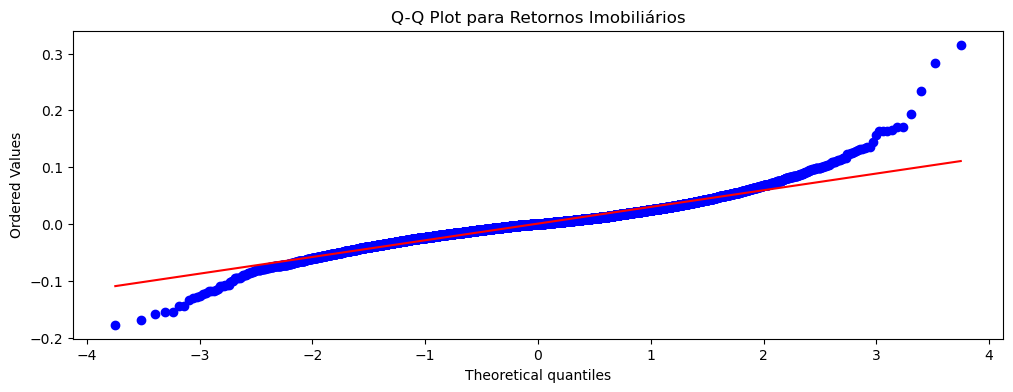

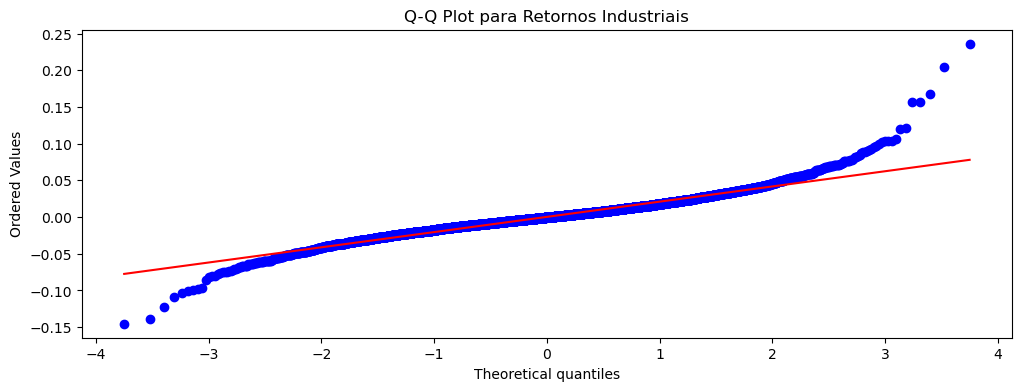

In [11]:
# Retornos imobiliários
plt.figure(figsize=(12, 4))
stats.probplot(retornos_imob.drop(columns=['Setor']).values.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot para Retornos Imobiliários')
plt.show()

# Retornos industriais
plt.figure(figsize=(12, 4))
stats.probplot(retornos_indust.drop(columns=['Setor']).values.flatten(), dist="norm", plot=plt)
plt.title('Q-Q Plot para Retornos Industriais')
plt.show()

#### **Teste de Levene**

Utilizado para verificar se as variâncias dos retornos diários entre os setores industriais e imobiliários são homogêneas.  
Um p-valor menor que 0,05 indica que as variâncias são significativamente diferentes, o que nos orienta a usar o teste t de Welch em vez do teste t padrão."

In [12]:
_, p_valor_homoge = stats.levene(retornos_indust.drop(columns=['Setor']).values.flatten(), retornos_imob.drop(columns=['Setor']).values.flatten())

#### **Teste T de Student (valor de p)**

In [13]:
t_stat, p_valor_t = stats.ttest_ind(retornos_indust.drop(columns=['Setor']).values.flatten(), retornos_imob.drop(columns=['Setor']).values.flatten(), equal_var=False)

#### **Tabela dinâmica**

In [14]:
tab_dinamica = pd.pivot_table(retornos, values='Retorno', index='Setor', aggfunc=['mean', 'std'])
tab_dinamica.columns = ['mean', 'std']

tab_dinamica

,mean,std
Setor,,
Imobiliário,-0.002414,0.009444
Industriais,0.003573,0.006155


#### **Cálculo (d de Cohen)**

Com este teste, podemos concluir se a diferença observada é apenas estatisticamente significativa ou também relevante na prática.

In [15]:
# Calcular o tamanho do efeito (d de Cohen)
nx = len(retornos_indust.drop(columns=['Setor']).values.flatten())
ny = len(retornos_imob.drop(columns=['Setor']).values.flatten())
dof = nx + ny - 2
cohen_d = (
    np.mean(retornos_indust.drop(columns=['Setor']).values.flatten()) - np.mean(
        retornos_imob.drop(columns=['Setor']).values.flatten())) / np.sqrt(((nx - 1) * np.var(
            retornos_indust.drop(columns=['Setor']).values.flatten()) + (ny - 1) * np.var(
                retornos_imob.drop(columns=['Setor']).values.flatten())) / dof)

cohen_d

-0.012843873540681946

Com este valor de "−0.012843869080956518", indica uma magnitude de efeito extremamente pequena entre os retornos diários dos setores imobiliários e industriais. Na prática, isso sugere que, apesar de haver uma diferença estatística (se o p-valor for significativo), a diferença real em termos de retorno diário entre os dois setores é quase insignificante.

Decisões de investimento poderiam ser baseadas em outros fatores, como risco, capitalização de mercado, ou potencial de crescimento futuro, em vez de se concentrar apenas nos retornos diários.

#### **Gráfico com médias e desvio padrão**

In [16]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Média e Desvio Padrão',
    x=tab_dinamica.index,
    y=tab_dinamica['mean'],
    error_y=dict(type='data', array=tab_dinamica['std']),
    marker_color='orange',
    orientation='v'
))
fig.update_layout(
    title_text='<b>Retornos Diários (média ± desvio padrão) <br> entre os setores Industriais e Imobiliário',
    xaxis_title='<b>Setor',
    yaxis_title='<b>Retornos Diários (%)',
    template="none",
    margin=dict(l=75, r=20, t=75, b=75),
    paper_bgcolor="#f7f8fa",
    font=dict(family="Arial", size=13, color="black"),
    width=800,
    height=650
)
fig.show()

**No gráfico as barras representam a média dos retornos diários, enquanto as linhas verticais indicam o desvio padrão.**

**Imobiliário (porção negativa):**  
- A barra amarela para o setor imobiliário está posicionada abaixo do eixo horizontal (zero), indicando uma média de retorno diário negativa. Isto sugere que, em média, o setor imobiliário teve perdas durante o período analisado.

- A linha preta vertical esquerda indica a variabilidade dos retornos (desvio padrão). Ela mostra que, apesar da média negativa, houve dias com retornos positivos.

**Industriais (porção positiva):**  

- A barra para o setor industrial está acima do zero, indicando uma média de retorno diário positiva. Este setor, em média, gerou lucros durante o período considerado.  

- Similar ao setor imobiliário, o desvio padrão indica uma variabilidade significativa nos retornos, com a linha vertical direita se estendendo para ambos os lados da média, mas mostrando maior quantidade retornos positivos e menor quantidade de dias negativos.

#### **Resultados**

In [17]:
print(f"P-valor para normalidade dos dados Industriais: {p_valor_normal_indust}\n"
      f"P-valor para normalidade dos dados Imobiliário: {p_valor_normal_imob}\n"
      f"P-valor para homogeneidade de variâncias: {p_valor_homoge}\n\n"
      
      f"Para o teste de normalidade dos dados Industriais: p-valor = {p_valor_normal_indust}.\n"
      "- Como p-valor < 0.05, rejeitamos H0 e os dados não podem ser considerados normalmente distribuídos.\n\n\n"
      f"Para o teste de normalidade dos dados Imobiliário: p-valor = {p_valor_normal_imob}.\n"
      "- Como p-valor < 0.05, rejeitamos H0 e os dados não podem ser considerados normalmente distribuídos.\n\n\n"
      f"Para o teste de homogeneidade de variâncias: p-valor = {p_valor_homoge}.\n"
      "- Como p-valor < 0.05, rejeitamos H0 e as variâncias não são homogêneas.\n\n\n"
      f"Para o teste T de Student: p-valor = {p_valor_t}.\n"
      "- Como p-valor > 0.05, falhamos em rejeitar H0 e não há uma diferença significativa entre as médias dos dois setores.\n\n\n"
      f"Tamanho do efeito (d de Cohen): {cohen_d}.\n"
      "- Um valor de d de Cohen próximo de 0 indica que a magnitude da diferença entre os grupos é muito pequena.")

P-valor para normalidade dos dados Industriais: 0.0
P-valor para normalidade dos dados Imobiliário: 2.2157310758183916e-286
P-valor para homogeneidade de variâncias: 2.1757518133239105e-85

Para o teste de normalidade dos dados Industriais: p-valor = 0.0.
- Como p-valor < 0.05, rejeitamos H0 e os dados não podem ser considerados normalmente distribuídos.


Para o teste de normalidade dos dados Imobiliário: p-valor = 2.2157310758183916e-286.
- Como p-valor < 0.05, rejeitamos H0 e os dados não podem ser considerados normalmente distribuídos.


Para o teste de homogeneidade de variâncias: p-valor = 2.1757518133239105e-85.
- Como p-valor < 0.05, rejeitamos H0 e as variâncias não são homogêneas.


Para o teste T de Student: p-valor = 0.42343238835440355.
- Como p-valor > 0.05, falhamos em rejeitar H0 e não há uma diferença significativa entre as médias dos dois setores.


Tamanho do efeito (d de Cohen): -0.012843873540681946.
- Um valor de d de Cohen próximo de 0 indica que a magnitude da d